1. 텍스트 스크래핑

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/데마팀플/항공사/tripadvisor\ 저가항공\ 리뷰

[Errno 107] Transport endpoint is not connected: '/content/drive/MyDrive/데마팀플/항공사/tripadvisor 저가항공 리뷰'
/content


In [3]:
import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 27
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Reg

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#fm._rebuild()
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [5]:
import pandas as pd

path = '/content/gdrive/MyDrive/데마팀플/data/'

jeju = pd.read_csv(path+"jeju.csv",encoding='cp949',index_col=0)
jin = pd.read_csv(path+"jin.csv",index_col=0, encoding='cp949')
eastar = pd.read_csv(path+"eastar.csv", encoding='cp949', index_col=0)
tway = pd.read_csv(path+"tway.csv",encoding='cp949',index_col=0)

data = pd.concat([jeju, jin, eastar, tway], axis=0)
data = data.drop(['reply_jin','reply_eastar'],axis=1)
data = data.dropna(axis=0)
data

,0
0,부산에서 다낭으로 출발하는 비행시간중에 유일하게 오전출발하는 항공사입니다.\n다시 ...
1,특가로 저렴하게 예약해서 다녀왔어요\n돌아올때 시간이 변경되었다고해서\n아예 늦은 ...
2,한국에 돌아올때 새벽에 인천에 들어온다...아침에 버스타고 회사에 가면 출근할수 있...
3,"주로 스얼을 타는 고객이지만, 가격이 싸게 나와 오키나와 노선을 이용했지만, 물을 ..."
4,"토요일 저녁 6시 정도 출발하는 비행기를 탑승하여 출국을 했고,\n목요일 새벽 0:..."
...,...
85,딱히 서비스가 나쁜 것도 아니고 가격이 비싼 것도 아니고 지연이 있다거나 한 것도 ...
86,저렴한 가격으로 잘 다녀왔습니다. 티웨이 처음 타보는데 가까운 거리 가기엔 괜찮은거...
87,"가격이 저렴하며, 일본발 항공은 고객에 대한 대처 및 서비스도 훌륭한 편입니다. 다..."
88,연착이나 지연이 좀 있는 편이나 약 두시간 거리인 타이완을 드나들기엔 가장 합리적인...


**2. 노이즈 캔슬링**

In [6]:
!git clone https://github.com/ssut/py-hanspell.git # 네이버 맞춤법 검사기

fatal: destination path 'py-hanspell' already exists and is not an empty directory.


In [7]:
#cd py-hanspell/

In [8]:
#!python setup.py install

In [9]:
#for i in data['reply_eastar']:
#  print(i)
#data['reply_eastar'][0]

**3. 토크나이징**
**4. 어휘 분석**

In [10]:
! pip install konlpy wordcloud

In [11]:
import konlpy
from konlpy.tag import Kkma, Okt, Hannanum, Komoran

In [12]:
#kkma = Kkma()
#okt = Okt()
hannanum = Hannanum()
#komoran = Komoran()

In [13]:
data = data.reset_index(drop=False,inplace=False)
data

,index,0
0,0,부산에서 다낭으로 출발하는 비행시간중에 유일하게 오전출발하는 항공사입니다.\n다시 ...
1,1,특가로 저렴하게 예약해서 다녀왔어요\n돌아올때 시간이 변경되었다고해서\n아예 늦은 ...
2,2,한국에 돌아올때 새벽에 인천에 들어온다...아침에 버스타고 회사에 가면 출근할수 있...
3,3,"주로 스얼을 타는 고객이지만, 가격이 싸게 나와 오키나와 노선을 이용했지만, 물을 ..."
4,4,"토요일 저녁 6시 정도 출발하는 비행기를 탑승하여 출국을 했고,\n목요일 새벽 0:..."
...,...,...
185,85,딱히 서비스가 나쁜 것도 아니고 가격이 비싼 것도 아니고 지연이 있다거나 한 것도 ...
186,86,저렴한 가격으로 잘 다녀왔습니다. 티웨이 처음 타보는데 가까운 거리 가기엔 괜찮은거...
187,87,"가격이 저렴하며, 일본발 항공은 고객에 대한 대처 및 서비스도 훌륭한 편입니다. 다..."
188,88,연착이나 지연이 좀 있는 편이나 약 두시간 거리인 타이완을 드나들기엔 가장 합리적인...


In [15]:
exp = data['0'][0]
print(hannanum.nouns(exp))

['부산', '다낭', '출발', '비행시간중', '유일', '오전출발', '항공사', '다낭', '추천드', '이번', '코로나19사태', '좋겠습니다']


In [16]:
def get_noun(text):
    noun = []
    #stopwords = ['이스타','이스타항공','저가항공','항공사','항공','ZE252','비행기','제주','김포','성수','인천','때문','동남아','것','좀']
    #stopwords = ['제주','제주항공','저가항공','항공사','항공','비행기','부산','한국','다낭','인천','때문','동남아','것','좀']
    #stopwords = ['진','진에어','저가항공','항공사','항공','대한항공','비행기','부산','한국','다낭','인천','때문','동남아','것','좀']
    stopwords = ['2시간','4시간','승무원들','30분','20분','1시간','정도','이번','생각','제주','제주항공','이스타','이스타항공','진','진에어','티웨','이항공','티웨이항공','티웨이','저가항공','저가항공사',
                 '저가항공사들','항공사','항공','대한항공','비행기','부산','ZE252','다낭','김포','성수','한국','인천','때문','동남아','것','좀']
    kk = hannanum.nouns(text)
    for i in kk:
      if len(i)>1 and i not in stopwords:
        noun.append(i)
    return noun

data['token'] = data['0'].apply(lambda x: get_noun(x))

In [18]:
data.head()

,index,0,token
0,0,부산에서 다낭으로 출발하는 비행시간중에 유일하게 오전출발하는 항공사입니다.\n다시 ...,"[출발, 비행시간중, 유일, 오전출발, 추천드, 코로나19사태, 좋겠습니다]"
1,1,특가로 저렴하게 예약해서 다녀왔어요\n돌아올때 시간이 변경되었다고해서\n아예 늦은 ...,"[특가, 저렴, 예약, 시간, 변경, 시간, 피곤하긴했는데, 좌석, 뒷자리, 아이,..."
2,2,한국에 돌아올때 새벽에 인천에 들어온다...아침에 버스타고 회사에 가면 출근할수 있...,"[새벽, 아침, 버스타, 회사, 출근, 월요일, 시간대]"
3,3,"주로 스얼을 타는 고객이지만, 가격이 싸게 나와 오키나와 노선을 이용했지만, 물을 ...","[스얼, 고객, 가격, 오키나, 노선, 이용, 불구, 면세품, 정신, 안주, 면세품..."
4,4,"토요일 저녁 6시 정도 출발하는 비행기를 탑승하여 출국을 했고,\n목요일 새벽 0:...","[토요일, 저녁, 6시, 출발, 탑승, 출국, 목요일, 새벽, 25분, 출발, 탑승..."


{'이용': 74, '좌석': 70, '서비스': 65, '비행': 48, '출발': 46, '가격': 46, '기내식': 44, '저가': 36, '지연': 36, '친절': 35, '만족': 33, '여행': 32, '시간': 31, '기내': 30, '도착': 29, '탑승': 26, '연착': 22, '공항': 22, '저렴': 21, '불편': 21, '노선': 16, '문제': 16, '저렴한': 16, '승무원': 15, '선택': 15, '추천': 15, '구매': 14, '가능': 13, '경우': 13, '지불': 13, '항공편': 13, '체크인': 13, '카운터': 13, '새벽': 12, '시간대': 12, '다음': 12, '수화물': 12, '비행시간': 11, '공간': 11, '비슷': 11, '아침': 10, '사람': 10, '의자': 10, '제공': 10, '거리': 10, '자리': 10, '특가': 9, '항공권': 9, '출발시간': 9, '가성비': 9, '직원들': 9, '추가': 9, '예약': 8, '회사': 8, '처음': 8, '피곤': 8, '오후': 8, '밤비행기': 8, '아이들': 8, '요금': 8}


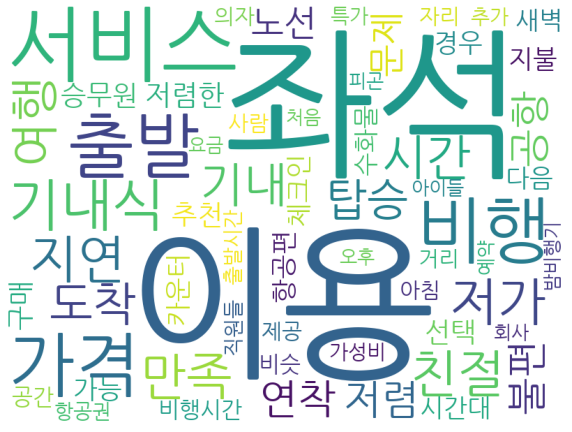

In [20]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib as mpl
import numpy as np

noun_list = []
for i in range(len(data)):
    for j in range(len(data['token'].iloc[i])):
        noun_list.append(data['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(60)

#wordcloud
wc = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',background_color='white', width=800, height=600)

print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()